In [47]:
%load_ext autoreload
%autoreload

import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import Normalizer, StandardScaler

sys.path.append('../')
from LinearModels import display_plot_logreg, display_plot_svc
sys.path.append('../../utils')
from utils import feature_selection, fs_driver, feature_snapshot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Features relevance

In [37]:
gt = pd.read_csv('../../../dumps/various_sizes/8K.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)
scaler = StandardScaler()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

clf = LogisticRegression(max_iter=1000,random_state=0)
clf.fit(data_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0, 0.5, 'Coefficient index')

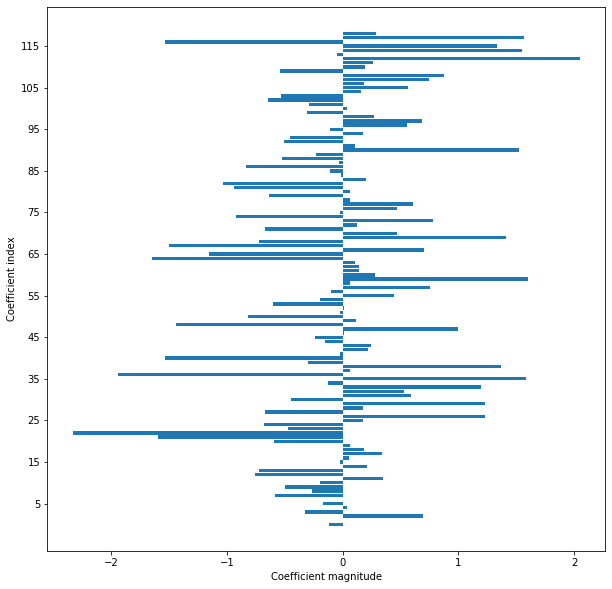

In [38]:
n_features = data.shape[1]
plt.rcParams["figure.figsize"] = (10,10)
plt.barh(range(n_features), clf.coef_[0], align='center') 
plt.yticks(np.arange(5,125,10), np.arange(5,125,10)) 
plt.xlabel("Coefficient magnitude")
plt.ylabel("Coefficient index")

Here below we will follow an iterative process in order to select the most relevant features of our model. The way it works is as follow : first we start a small training set, measure the accuracy and select the most relevant features using *SelectFromModel*. Then we apply the same reasoning on a slightly larger training set. Between two iterations, the set of features that is kept is the intersection between the current best features and the previous ones. This process is called "iterative process" in the below array. The second row describes the case were we simply keep the K best features and the first one are the default accuracies without tuning.

In [43]:
feature_selection('../../../dumps/various_sizes/8K.csv', 'log')

Execution            # features  Features selected        Training set acc    Test acc    Time (s)    Fixed cost (s)
-----------------  ------------  ---------------------  ------------------  ----------  ----------  ----------------
Classic                     119  ['f1',...,'f119']                0.996219    0.994329    0.303081          0
K best features             117  ['f1','f3','f4',                 0.996219    0.994329    0.271789          0.30692
                                 'f5','f6','f8',
                                 'f9','f10','f11',
                                 'f12','f13','f14',
                                 'f15','f16','f17',
                                 'f18','f19','f20',
                                 'f21','f22','f23',
                                 'f24','f25','f26',
                                 'f27','f28','f29',
                                 'f30','f31','f32',
                                 'f33','f34','f35',
                        

[['K best features',
  array(['f1', 'f3', 'f4', 'f5', 'f6', 'f8', 'f9', 'f10', 'f11', 'f12',
         'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21',
         'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30',
         'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39',
         'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48',
         'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57',
         'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66',
         'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75',
         'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84',
         'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93',
         'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102',
         'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110',
         'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118',
         'f119'], dtype=object),
  -0.

As we can conclude from the above graph and these new results, the model is definitely dependent from many different features (some of them might still have more impact than others) since going from 119 to 76 features decreases the precision by 1.2%. On the other side, although the iterative process is way more slower, the difference between 76 and 19 features is null.

Let's, once more, try the feature extraction on a dataset of 16K samples and see how the performances are impacted.

In [44]:
feature_selection('../../../dumps/various_sizes/16K.csv', 'log')

Execution            # features  Features selected        Training set acc    Test acc    Time (s)    Fixed cost (s)
-----------------  ------------  ---------------------  ------------------  ----------  ----------  ----------------
Classic                     119  ['f1',...,'f119']                0.991971    0.990648    0.652608          0
K best features             117  ['f1','f3','f4',                 0.991971    0.990648    0.586606          0.693657
                                 'f5','f6','f8',
                                 'f9','f10','f11',
                                 'f12','f13','f14',
                                 'f15','f16','f17',
                                 'f18','f19','f20',
                                 'f21','f22','f23',
                                 'f24','f25','f26',
                                 'f27','f28','f29',
                                 'f30','f31','f32',
                                 'f33','f34','f35',
                       

[['K best features',
  array(['f1', 'f3', 'f4', 'f5', 'f6', 'f8', 'f9', 'f10', 'f11', 'f12',
         'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21',
         'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30',
         'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39',
         'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48',
         'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57',
         'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66',
         'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75',
         'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84',
         'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93',
         'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102',
         'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110',
         'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118',
         'f119'], dtype=object),
  -0.

Same observation as before except that now feature selection both decreases slightly the precision but does also increase computation time (it might be because of dataset reconstruction).

### Feature threshold variation

In [45]:
fs_driver('../../../dumps/various_sizes/16K.csv','log',[0.01,0.10,0.20,0.40,0.80])

Threshold : 0.010000
Execution            # features  Features selected        Training set acc    Test acc    Time (s)    Fixed cost (s)
-----------------  ------------  ---------------------  ------------------  ----------  ----------  ----------------
Classic                     119  ['f1',...,'f119']                0.991971    0.990648    0.62322           0
K best features             116  ['f1','f3','f4',                 0.991971    0.990648    0.613947          0.648167
                                 'f5','f6','f8',
                                 'f9','f10','f11',
                                 'f12','f13','f14',
                                 'f15','f16','f17',
                                 'f18','f19','f20',
                                 'f21','f22','f23',
                                 'f24','f25','f26',
                                 'f27','f28','f29',
                                 'f30','f31','f32',
                                 'f33','f34','f35',
  

Execution            # features  Features selected        Training set acc    Test acc    Time (s)    Fixed cost (s)
-----------------  ------------  ---------------------  ------------------  ----------  ----------  ----------------
Classic                     119  ['f1',...,'f119']                0.991971    0.990648    0.626255          0
K best features              54  ['f1','f3','f9',                 0.990256    0.988155    0.451793          0.654088
                                 'f10','f15','f17',
                                 'f21','f22','f23',
                                 'f24','f25','f27',
                                 'f30','f32','f33',
                                 'f34','f36','f37',
                                 'f39','f40','f41',
                                 'f43','f48','f49',
                                 'f51','f55','f56',
                                 'f58','f59','f60',
                                 'f61','f64','f65',
                   

[['K best features',
  array(['f1', 'f3', 'f4', 'f5', 'f6', 'f8', 'f9', 'f10', 'f13', 'f14',
         'f15', 'f16', 'f17', 'f18', 'f19', 'f21', 'f22', 'f23', 'f24',
         'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33',
         'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42',
         'f43', 'f46', 'f47', 'f48', 'f49', 'f51', 'f53', 'f54', 'f55',
         'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f63', 'f64', 'f65',
         'f66', 'f67', 'f68', 'f70', 'f71', 'f72', 'f73', 'f75', 'f77',
         'f78', 'f79', 'f80', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87',
         'f88', 'f90', 'f91', 'f93', 'f94', 'f95', 'f96', 'f98', 'f99',
         'f100', 'f102', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109',
         'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117',
         'f118', 'f119'], dtype=object),
  617.9795174848873],
 ['Iterative process',
  ['f4',
   'f5',
   'f6',
   'f10',
   'f14',
   'f23',
   'f25',
   'f26',
   'f27',
   'f28',
  

Quite unintuitve to see that around 8-10 features eventually describes most of the model when we look at features dispersion.

In [49]:
feature_snapshot('../../../dumps/time_analysis/threshold_3/3_20190615_31000.csv','log')

K best features : 

Accuracy on training set: 0.884
Accuracy on test set: 0.896
------------------------------ 

Iterative process : 

Accuracy on training set: 0.957
Accuracy on test set: 0.957
